# Atari RGMs

This notebooks shows how to fit RGMs on Atari expert play.

To get the expert data, download .zip files from: https://drive.google.com/drive/folders/1JzF74ll6vpKgDs5jajcq3Xd2TQ2Kl-hE

Drop the files into `../data/atari/<game>` and/or adjust the data_dir below.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rgm import *

In [2]:
data_dir = "../data/atari"

game = "boxing"
action_range = [3, 17]

warmup = 0
structure_learn = 1024
B_learn = 0

In [4]:
import numpy as np
import jax

expert_imgs = np.load(data_dir + "/" + game + "/frames.npz")["arr_0"][0, :, 0, :, :, :] # 64x64
expert_actions = np.load(data_dir + "/" + game + "/actions.npz")["arr_0"][0]

# uncomment if you want higher resolution
# expert_imgs = np.load(data_dir + "/" + game + "/raw_frames.npz")["arr_0"][0]
# expert_imgs = jax.image.resize( expert_imgs / 255.0, shape=(expert_imgs.shape[0],128, 128, 3), method="cubic")

(1024, 64, 64, 3)
(1024, 1)


expert

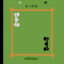

In [5]:
import mediapy
import jax.numpy as jnp

observations = expert_imgs[warmup:warmup+structure_learn]
actions = expert_actions[warmup : warmup + structure_learn]
print(observations.shape)
print(actions.shape)

with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos({"expert": [i for i in observations]}, width=160, height=210, fps=20, codec="gif")

In [6]:
print(min(actions), max(actions))

[3] [16]


In [7]:
rgm = RGM(sv_thr=1.0 / 256, action_range=action_range, n_bins=action_range[1] - action_range[0] + 1, tile_diameter=16)

In [8]:
_ = rgm.to_one_hot(observations, actions)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [9]:
rgm.learn_structure(observations, actions)

structure learn level 0 group 0 time 3.61858868598938
structure learn level 0 group 1 time 2.650383234024048
structure learn level 0 group 2 time 2.3111023902893066
structure learn level 0 group 3 time 8.180518388748169
structure learn level 1 group 0 time 1.5816326141357422


In [10]:
if B_learn > 0:
    observations = expert_imgs[warmup + structure_learn : warmup + structure_learn + B_learn]
    actions = expert_actions[warmup + structure_learn : warmup + structure_learn + B_learn]
    rgm.learn_B(observations, actions)

In [11]:
rgm.save("../data/rgms/" + game+"_rgm.npz")

Now we can test inference and prediction

In [12]:
qs = rgm.infer_states(observations[:4], actions[:4], None)
print(qs)

[Array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [13]:
qs = rgm.infer_states(observations[:4], None, None)
print(qs)

[Array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [14]:
imgs, u = rgm.reconstruct(qs)
print(u)
print(actions[:4])
print(u - actions[:4])

[[7.]
 [7.]
 [7.]
 [7.]]
[[7]
 [7]
 [7]
 [7]]
[[0.]
 [0.]
 [0.]
 [0.]]


input,reconstruction

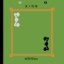
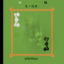

In [15]:
import mediapy

with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos(
        {"input": [observations[i] for i in range(4)], "reconstruction": [im for im in imgs]}, width=320, height=320, fps=2, codec="gif"
    )

In [16]:
priors = rgm.update_empirical_prior(jnp.array([[0]]), qs)

In [17]:
priors[-1]

Array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [18]:
print(priors[-1][0].shape)

(1, 256)


[[7.]
 [7.]
 [7.]
 [7.]]
[[7]
 [7]
 [7]
 [7]]
[[0.]
 [0.]
 [0.]
 [0.]]


input_next,prediction

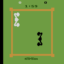
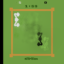

In [19]:
imgs, u = rgm.reconstruct([priors[-1][0]])
print(u)
print(actions[4:8])
print(u - actions[4:8])
with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos({"input_next": [observations[i] for i in range(4,8)], "prediction": [im for im in imgs]}, width=320, height=320, fps=2, codec="gif")

In [20]:
qs_next = rgm.infer_states(observations[4:8], None, priors)

In [21]:
print(qs_next)

[Array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

[[7.]
 [7.]
 [7.]
 [7.]]


next

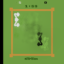

In [22]:
imgs, u = rgm.reconstruct(qs_next)
print(u)
with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos({"next": [im for im in imgs]}, width=320, height=320, fps=2, codec="gif")

imagination

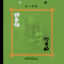

In [23]:
o, p = predict(rgm.agents, qs, jnp.array([[0]]), num_steps=20)
imgs, u = rgm.discrete_2_rgb_action(o[0])

with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos({"imagination": [im for im in imgs]}, width=320, height=320, fps=20, codec="gif")

and reconstruct masked inputs

masked,unmasked

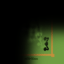
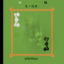

In [24]:
mask_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13]

one_hot_masked = rgm.to_one_hot(observations[:4], actions[:4], mask_indices=mask_indices)
mims, u = rgm.discrete_2_rgb_action(one_hot_masked)

qs = rgm.infer_states(one_hot_masked, one_hot_obs=True)
ims, u = rgm.reconstruct(qs)

with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos(
        {"masked": [mims[i] for i in range(4)], "unmasked": [ims[i] for i in range(4)]},
        width=320,
        height=320,
        fps=2,
        codec="gif",
    )

Let's play the game!

In [4]:
from atari.common import make_game, game_config, ObservationType

env = make_game(game_config(game.capitalize(), ObservationType.RGB))

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [34]:
import mediapy
import jax
from tqdm import tqdm

imgs = []

# rgm = RGM(sv_thr=1.0 / 256, action_range=action_range, n_bins=action_range[1] - action_range[0] + 1, tile_diameter=16)
# rgm.load("../data/rgms/" + game+"_rgm.npz")
rgm_agent = RGMAgent(rgm)

timesteps = 2000

rewards = 0

obs, _ = env.reset()
imgs.append(obs)
for i in tqdm(range(timesteps)):
    obs = jax.image.resize(obs, (64, 64, 3), "cubic")
    action = rgm_agent.act(obs)
    action = int(action[0])
    obs, reward, done, trunc, info = env.step(action)
    rewards += reward
    imgs.append(obs)
    if done:
        break

print(rewards)
with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos({game: imgs}, width=160, height=210, fps=20, codec="h264")

  0%|          | 0/2000 [00:00<?, ?it/s]

 89%|████████▉ | 1783/2000 [05:27<00:39,  5.44it/s]


-5.0


In [37]:
from dataclasses import asdict, dataclass


@dataclass
class A(dict):
    a: int
    b: int

    def __init__(self, a, b):
        super().__init__(a=a, b=b)

test = A(1,2)
print(**test)